In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Load the dataset from the provided file path
oil_data = pd.read_excel(r"C:\Users\Astika Urmaliya\Downloads\Crude Oil Prices Daily.xlsx")

In [3]:
# Display the first few rows of the dataset to understand its structure
oil_data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
# Display the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(oil_data.head())


First 5 Rows of the Dataset:
        Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(oil_data.describe())



Summary Statistics:
                                Date  Closing Value
count                           8223    8216.000000
mean   2002-04-05 22:11:15.082086912      43.492139
min              1986-01-02 00:00:00      10.250000
25%              1994-01-25 12:00:00      19.577500
50%              2002-04-02 00:00:00      29.610000
75%              2010-06-12 12:00:00      63.402500
max              2018-07-09 00:00:00     145.310000
std                              NaN      29.616804


In [6]:
# Check for missing values
print("\nMissing Values:")
print(oil_data.isnull().sum())


Missing Values:
Date             0
Closing Value    7
dtype: int64


In [7]:
# Check for duplicates
print("\nDuplicate Rows:")
print(oil_data.duplicated().sum())


Duplicate Rows:
0


In [8]:
# Convert the 'Date' column to datetime format for better handling
oil_data['Date'] = pd.to_datetime(oil_data['Date'])

In [9]:
# Basic statistics of the 'Closing Value'
summary_stats = oil_data['Closing Value'].describe()

In [10]:
# Checking for missing values
missing_values = oil_data.isnull().sum()

In [11]:
# Display the summary statistics and missing values
summary_stats, missing_values, plt.show()

(count    8216.000000
 mean       43.492139
 std        29.616804
 min        10.250000
 25%        19.577500
 50%        29.610000
 75%        63.402500
 max       145.310000
 Name: Closing Value, dtype: float64,
 Date             0
 Closing Value    7
 dtype: int64,
 None)

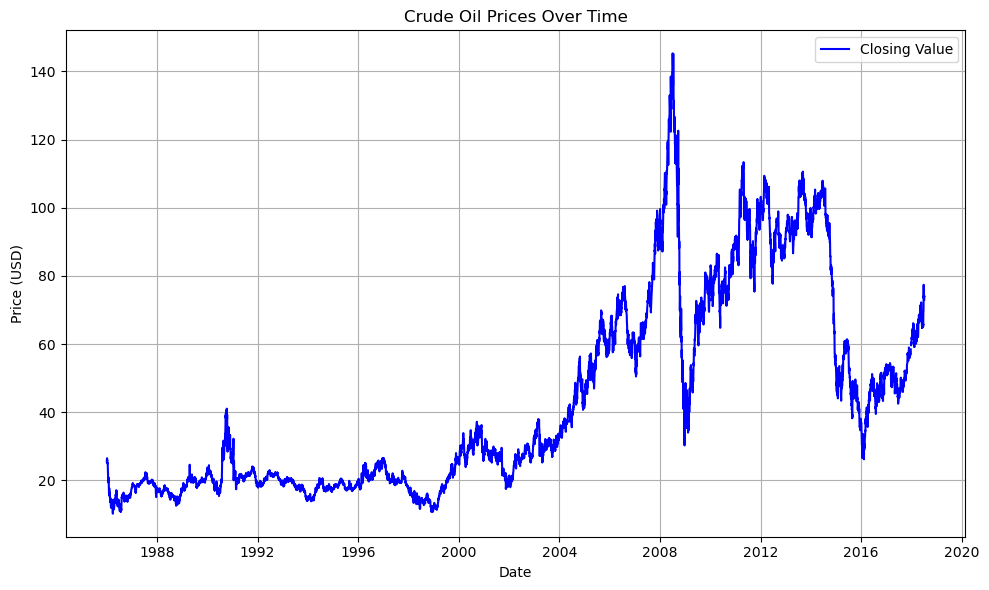

In [12]:
plt.figure(figsize=(10,6))
plt.plot(oil_data['Date'], oil_data['Closing Value'], color='blue', label='Closing Value')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [13]:
# Using linear interpolation to fill missing values in 'Closing Value'
oil_data['Closing Value'].interpolate(method='linear', inplace=True)

# Verify that there are no more missing values
missing_values_after = oil_data.isnull().sum()
missing_values_after

C:\Users\Astika Urmaliya\AppData\Local\Temp\ipykernel_12456\3055277355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil_data['Closing Value'].interpolate(method='linear', inplace=True)


Date             0
Closing Value    0
dtype: int64

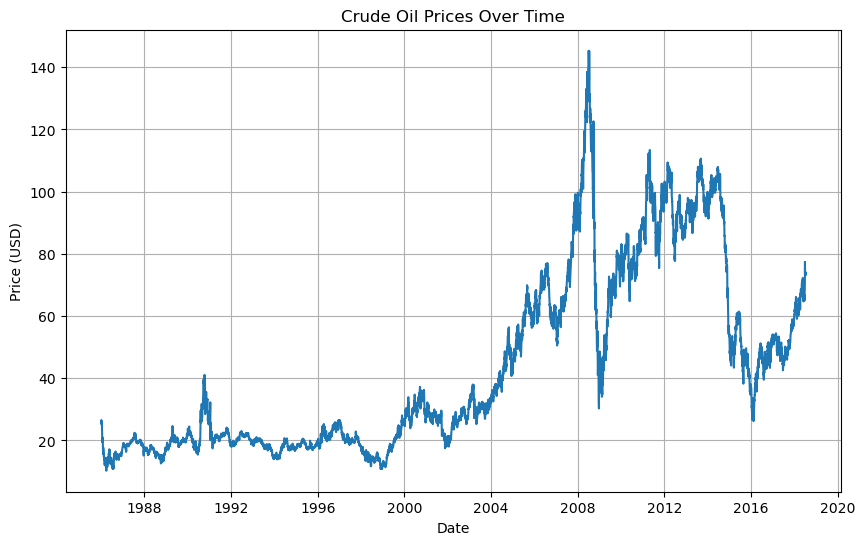

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(oil_data['Date'], oil_data['Closing Value'], label='Closing Value')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [15]:
# Check column types and numerical/categorical columns
numerical_cols = oil_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = oil_data.select_dtypes(include=['object']).columns


Distribution of Numerical Columns:


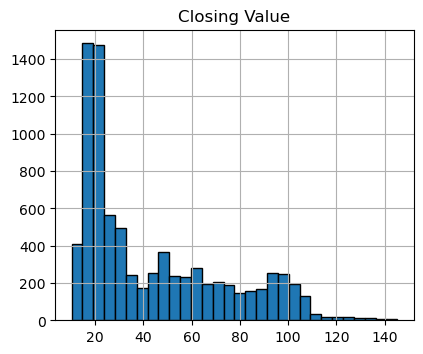

In [16]:
# 1. Distribution of Numerical Columns (Histograms)
print("\nDistribution of Numerical Columns:")
oil_data[numerical_cols].hist(figsize=(12, 10), bins=30, layout=(3, 3), edgecolor='black')
plt.tight_layout()
plt.show()


Correlation Heatmap:


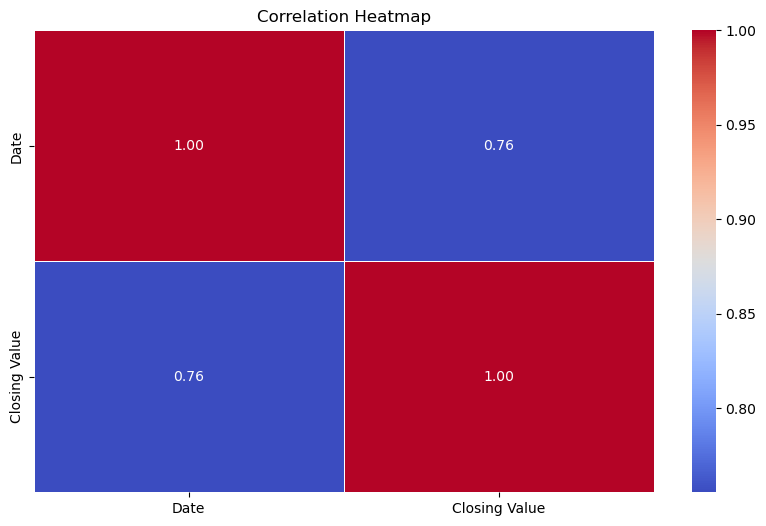

In [17]:


# Ensure the data is numerical for correlation
correlation_matrix = oil_data.corr()

# Plotting the Correlation Matrix Heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


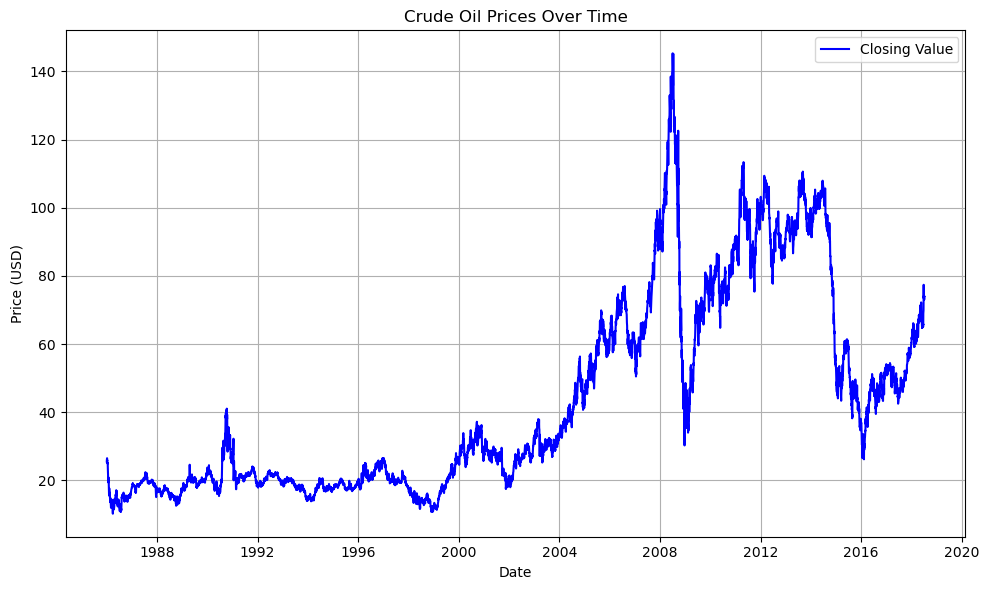

In [18]:
plt.figure(figsize=(10,6))
plt.plot(oil_data['Date'], oil_data['Closing Value'], color='blue', label='Closing Value')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()

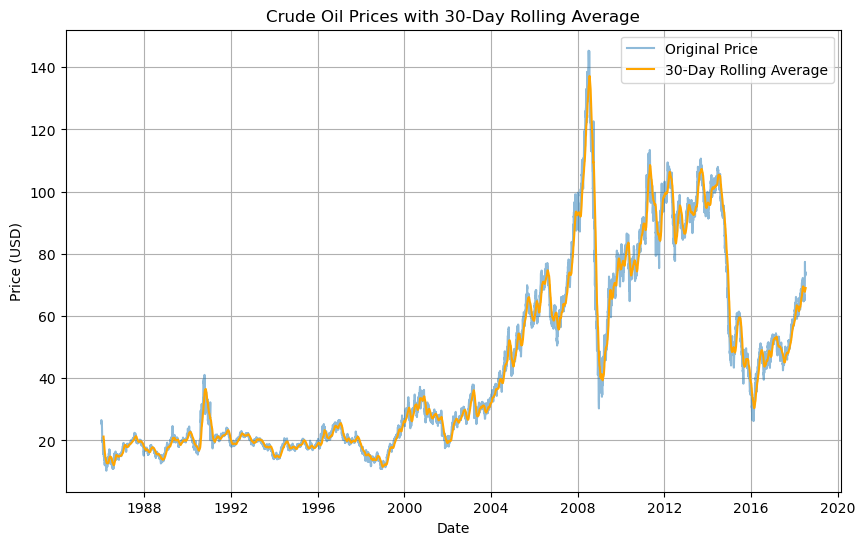

In [19]:
oil_data['Rolling Mean'] = oil_data['Closing Value'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(oil_data['Date'], oil_data['Closing Value'], label='Original Price', alpha=0.5)
plt.plot(oil_data['Date'], oil_data['Rolling Mean'], label='30-Day Rolling Average', color='orange')
plt.title('Crude Oil Prices with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

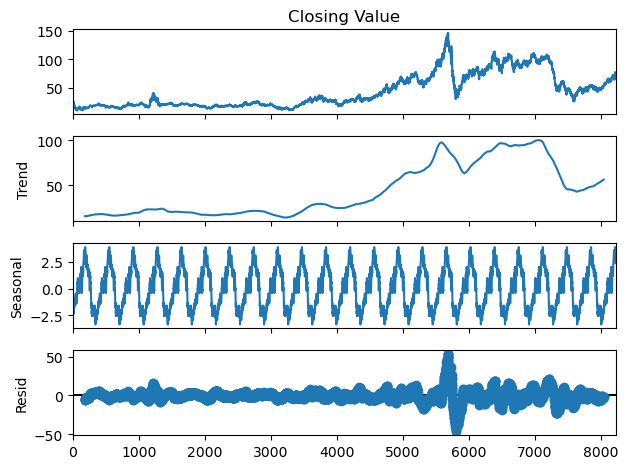

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(oil_data['Closing Value'], period=365)
decomposition.plot()
plt.show()


Boxplots of Numerical Columns:


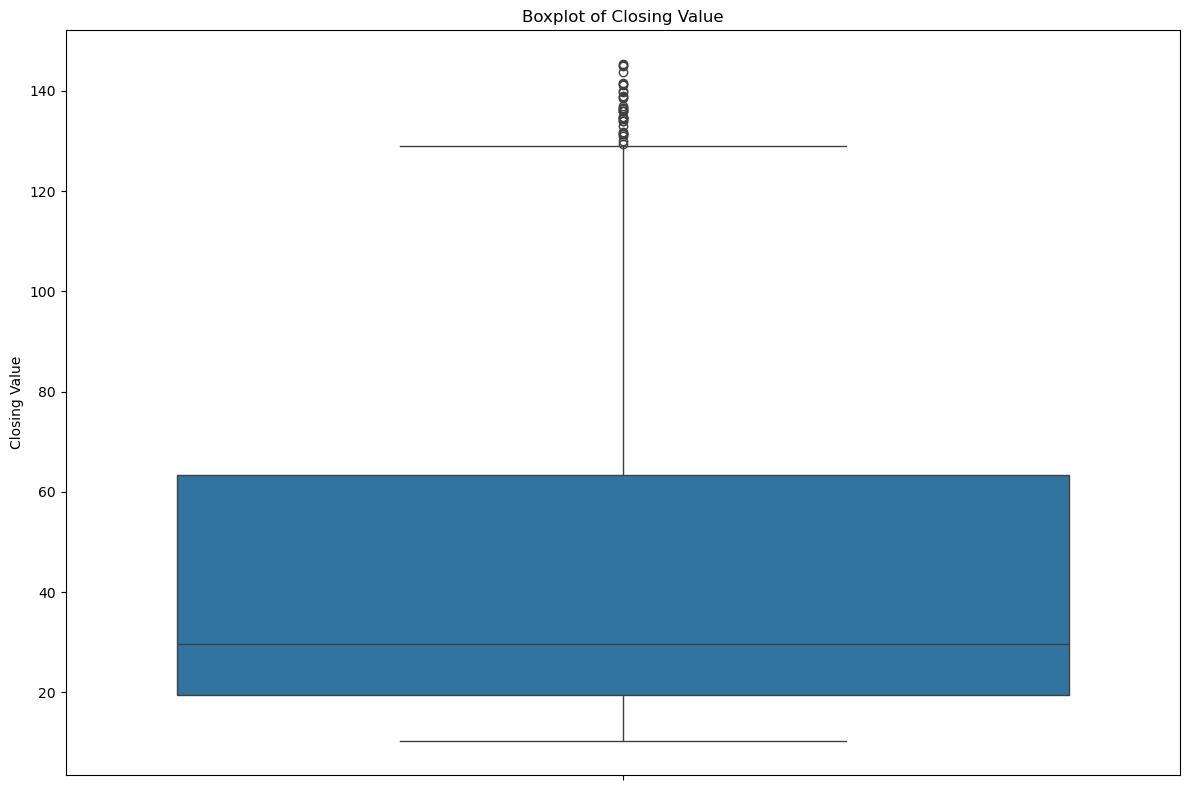

In [21]:
# 2. Boxplots for Numerical Columns (to check for outliers)
print("\nBoxplots of Numerical Columns:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(oil_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

C:\Users\Astika Urmaliya\AppData\Local\Temp\ipykernel_12456\3622839805.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=oil_data_no_outliers[col], palette='viridis')


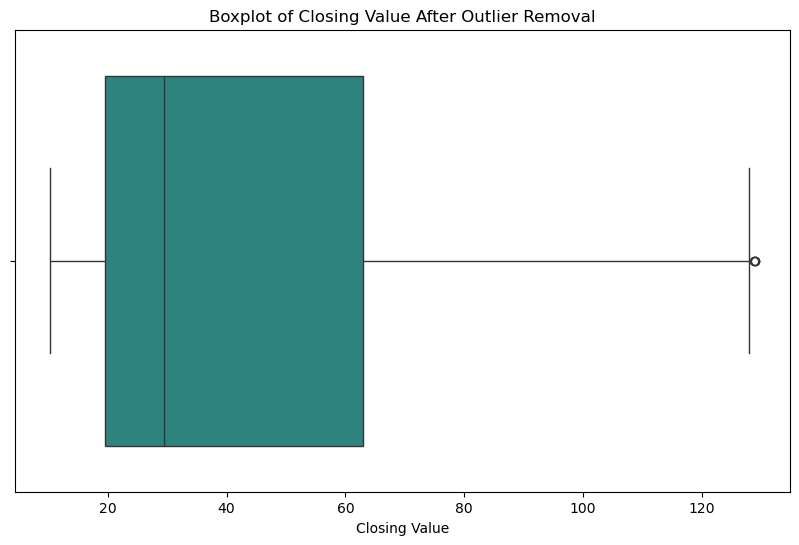

C:\Users\Astika Urmaliya\AppData\Local\Temp\ipykernel_12456\3622839805.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=oil_data_no_outliers[col], palette='viridis')


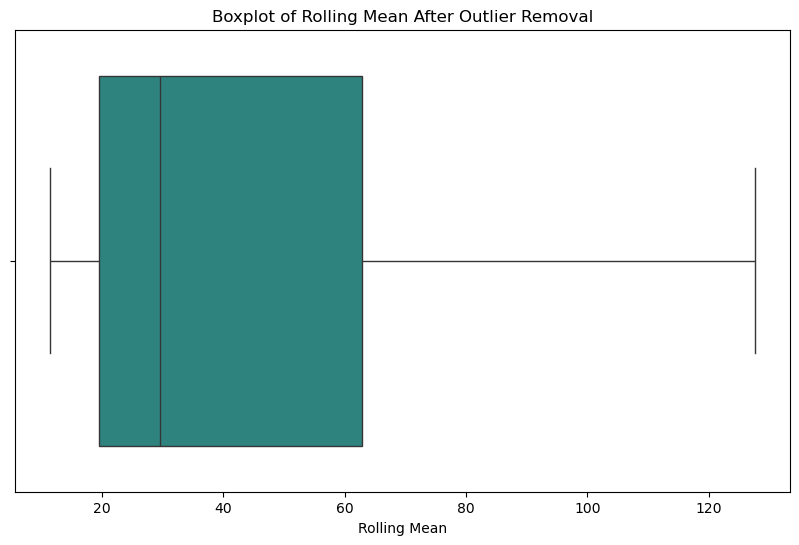

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(oil_data, column):
    Q1 = oil_data[column].quantile(0.25)
    Q3 = oil_data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    return oil_data[(oil_data[column] >= lower_bound) & (oil_data[column] <= upper_bound)]

# List of numerical columns to check for outliers
numerical_columns = ['Closing Value', 'Rolling Mean']  # Use the correct column names
oil_data_no_outliers = oil_data.copy()

# Iterate through numerical columns and remove outliers
for col in numerical_columns:
    oil_data_no_outliers = remove_outliers(oil_data_no_outliers, col)
    
    # Plot boxplot after outlier removal
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=oil_data_no_outliers[col], palette='viridis')
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(oil_data['Closing Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.007660621375339
p-value: 0.28322431823200145


In [24]:
oil_data['Differenced'] = oil_data['Closing Value'].diff().dropna()

# Perform the ADF test again on the differenced data
result_diff = adfuller(oil_data['Differenced'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -12.822701075895546
p-value (Differenced): 6.1051132812600796e-24


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
import matplotlib.pyplot as plt

In [26]:
print(oil_data.columns)

Index(['Date', 'Closing Value', 'Rolling Mean', 'Differenced'], dtype='object')


In [27]:
# Assuming oil_data is your DataFrame with a 'Date' and 'Closing Value' columns
# Ensure 'Date' is datetime and set as index
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
oil_data.set_index('Date', inplace=True)

In [28]:
# Split the data into training and test sets
train_size = int(len(oil_data) * 0.8)
train, test = oil_data['Closing Value'].iloc[:train_size], oil_data['Closing Value'].iloc[train_size:]

In [29]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [30]:
# 1. ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))  # Adjust order as needed
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
arima_rmse = calculate_rmse(test, arima_forecast)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

In [31]:
# 2. SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders as needed
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_rmse = calculate_rmse(test, sarima_forecast)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

In [32]:
# 3. Exponential Smoothing Model (ETS)
ets_model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12)  # Adjust as needed
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(len(test))
ets_rmse = calculate_rmse(test, ets_forecast)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [33]:
# 4. Prophet Model
prophet_data = oil_data[['Closing Value']].reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values
train_prophet, test_prophet = prophet_data.iloc[:train_size], prophet_data.iloc[train_size:]

In [34]:
prophet_model = Prophet()
prophet_model.fit(train_prophet)
future = prophet_model.make_future_dataframe(periods=len(test_prophet))
prophet_forecast = prophet_model.predict(future)
prophet_rmse = calculate_rmse(test_prophet['y'].values, prophet_forecast['yhat'].iloc[-len(test_prophet):].values)

18:32:45 - cmdstanpy - INFO - Chain [1] start processing
18:32:46 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Print RMSE values
print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')
print(f'ETS RMSE: {ets_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

ARIMA RMSE: 37.73318303449777
SARIMA RMSE: 47.60547271219991
ETS RMSE: 47.71519584879149
Prophet RMSE: 41.09115874064663


In [36]:
import joblib
joblib.dump(arima_fit, 'best_arima_model.pkl')

['best_arima_model.pkl']